In [3]:
!pip install --user imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier


## INTRO

The goal of this project is to create a machine learning model to help Interconnect predict the likelihood of a customer leaving. We will use personal and contractual data as well as information about the types of services of both active and inactive users. 

The model will be assessed using AUC-ROC as the primary metric of performance. We will be aiming to achieve at least a 75 auc-roc score on our test set.

### Reading in and merging data

In [2]:
#read in data - for personal computer
df_phone = pd.read_csv('/Users/hugo/Downloads/final_provider/phone.csv')
df_personal = pd.read_csv('/Users/hugo/Downloads/final_provider/personal.csv')
df_internet = pd.read_csv('/Users/hugo/Downloads/final_provider/internet.csv')
df_contract = pd.read_csv('/Users/hugo/Downloads/final_provider/contract.csv')


In [2]:
#read in data - for jupyter notebook
# df_phone = pd.read_csv('phone.csv')
# df_personal = pd.read_csv('personal.csv')
# df_internet = pd.read_csv('internet.csv')
# df_contract = pd.read_csv('contract.csv')
#read in data - for jupyter notebook
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')




In [3]:
#display df_phone
display(df_phone.head())
display(df_phone.info())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [4]:
#display df_personal
display(df_personal.head())
df_personal.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [5]:
#display df_internet
display(df_internet.head())
df_contract.info()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
#display df_contract
display(df_contract.head())
df_internet.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [7]:
#create a merged df with all data based on customerID
df_all = pd.merge(df_contract, df_personal, on='customerID', how='outer')
df_all = pd.merge(df_all, df_phone, on='customerID', how='outer')
df_all = pd.merge(df_all, df_internet, on='customerID', how='outer')

df_all


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,NaN,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


<div class="alert alert-success">
<b>Reviewer's comment</b>

Dataframes were merged correctly

</div>

### Data Cleaning and Feature Engineering

Here is what I will work on in this section:

- fill in NA values
- lowercase column names 
- change totalcharges feature from obj to numeric
- use encoding to encode categorical features
- scale numerical features (monthly, total, and tenure). Using minmax because distribution is not normal

- add column called 'churn' based off of the endate column to create binary classification targets
- add number of months using service column


In [8]:
#turn all null values into no 
df_all = df_all.fillna('No')

In [9]:
#see if there are null values
df_all.isnull().sum()

#delete rows where total_charges is null
df_all = df_all[df_all['TotalCharges'].notna()]

In [10]:
#lowercase all column names 
df_all.columns = df_all.columns.str.lower()

In [11]:
#change the column names to have proper _ instead of them being mushed together 
column_names = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies' ]

df_all.columns = column_names

In [12]:
#change totalcharges to numeric
df_all['total_charges'] = pd.to_numeric(df_all['total_charges'], errors='coerce')

In [13]:
#encode categorical features

#instantiate label encoder
le = LabelEncoder()

#create list of columns that need to be encoded
column_list = ['paperless_billing', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

#using a for loop to change all columns in the list to label encoded
for column in column_list:
    df_all[column] = le.fit_transform(df_all[column])
    print(column, le.classes_)


paperless_billing ['No' 'Yes']
gender ['Female' 'Male']
senior_citizen [0 1]
partner ['No' 'Yes']
dependents ['No' 'Yes']
multiple_lines ['No' 'Yes']
online_security ['No' 'Yes']
online_backup ['No' 'Yes']
device_protection ['No' 'Yes']
tech_support ['No' 'Yes']
streaming_tv ['No' 'Yes']
streaming_movies ['No' 'Yes']


In [14]:
#turn internet service names into a list from value_counts
internet_service_list = ['fiber_optic', 'dsl', 'no']

#turn the types of payment methods into a list
payment_method_list = ['electronic_check', 'mailed_check', 'bank_transfer', 'credit_card']

#turn the types of contracts into a list
contract_list = ['Month_to_month', 'one_year', 'two_year']

In [15]:
#onehot encode categorical features

#instantiate onehot encoder
ohe = OneHotEncoder(sparse=False)

#transform and fit payment_method, internet_service, and type
payment_method = ohe.fit_transform(df_all[['payment_method']])
internet_service = ohe.fit_transform(df_all[['internet_service']])
type_ = ohe.fit_transform(df_all[['type']])


/home/jovyan/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
#turn the transformed columns into dataframes
payment_method = pd.DataFrame(payment_method, columns=payment_method_list)
internet_service = pd.DataFrame(internet_service, columns=internet_service_list)
type_ = pd.DataFrame(type_, columns=contract_list)

#drop the original columns
df_all = df_all.drop(['payment_method', 'internet_service', 'type'], axis=1)

#concat the dataframes together
df_all = pd.concat([df_all, payment_method, internet_service, type_], axis=1)

In [17]:
#create a new column called churn that is 1 if there is a date and 0 if it says no based on enddate column
df_all['churn'] = np.where(df_all['end_date'] == 'No', 0, 1)

In [18]:
#change all enddate values to 2020-02-01 
df_all['end_date'] = np.where(df_all['end_date'] == 'No', '2020-02-01', df_all['end_date'])

#change begindate and enddate to datetime
df_all['begin_date'] = pd.to_datetime(df_all['begin_date'])
df_all['end_date'] = pd.to_datetime(df_all['end_date'])

#create a new column called tenure that is the difference between enddate and begindate
df_all['tenure'] = df_all['end_date'] - df_all['begin_date']

In [19]:
#change tenure to numeric and divide by 30 to get tenure in months 
df_all['tenure'] = (df_all['tenure'].dt.days/30).round(0)

## EDA

For the EDA, my strategy is going to be to try to see if each feature has a correlation with whether or not they are likely to churn or not using visual methods

To achieve this I will ask and try to answer questions based on each feature that relates to churn. 


### Check the imbalance of the dataset

In [20]:
#see how many people churned vs how many didnt 
df_all['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

So we have quite an unbalanced dataset where a majority of people are still active on the service. I will use a method like SMOTE later on after creating train and test sets

### When do people generally leave the service? 

In [21]:
#turn end_date into a datetime object
df_all['end_date'] = pd.to_datetime(df_all['end_date'])

#create a new column called month that is the month of the end_date
df_all['month'] = df_all['end_date'].dt.month

#plot the distribution of the months
df_all['month'].value_counts()


2     5174
11     485
12     466
1      460
10     458
Name: month, dtype: int64

We can see that there is a pretty even distribution of terminations between the months in the dataset. Note: Feb is the end of the dataset so these users are still active

### How many months does the average person use the service before leaving? 

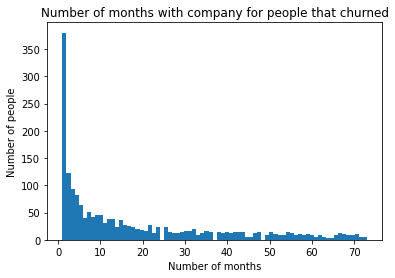

In [22]:
#for all people that have churned, lets see how long they were with the company using a histogram
plt.hist(df_all[df_all['churn'] == 1]['tenure'], bins=75)
#title the plot number of days with company for people that churned
plt.title('Number of months with company for people that churned')
plt.xlabel('Number of months')
plt.ylabel('Number of people')


plt.show()

So we can see here that the majority of people who left the service had left within the first couple of months. So this is a feature that we definitely need to include in the model because there is a correlation between number of months using the service and whether or not a member leaves the service. 

It may be necessary to send newer members more aggressive promotions or ad campaigns because that is when they are most likely to cancel

### How much does the average user spend? Showing differences between churned and active users

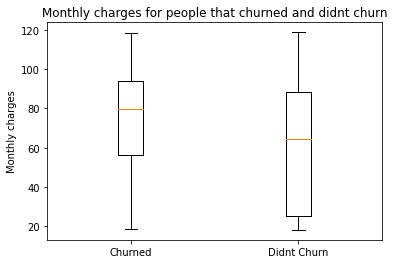

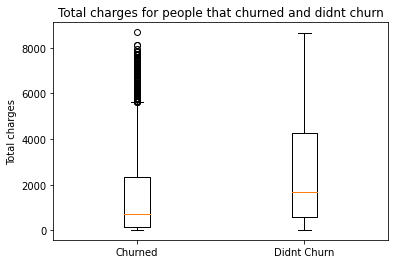

In [23]:
#create plot between monthly charges and churn for people that churned and didnt churn
plt.boxplot([df_all[df_all['churn'] == 1]['monthly_charges'], df_all[df_all['churn'] == 0]['monthly_charges']])

#title the plot monthly charges for people that churned and didnt churn
plt.title('Monthly charges for people that churned and didnt churn')
plt.ylabel('Monthly charges')

#label the x axis
plt.xticks([1, 2], ['Churned', 'Didnt Churn'])

plt.show()

#delete null values in total charges and total_charges s
df_all = df_all[df_all['total_charges'].notna()]
df_all = df_all[df_all['total_charges'].notna()]


#create boxplot between total charges and churn for people that churned and didnt churn
plt.boxplot([df_all[df_all['churn'] == 1]['total_charges'], df_all[df_all['churn'] == 0]['total_charges']])
#title the plot total charges for people that churned and didnt churn
plt.title('Total charges for people that churned and didnt churn')
plt.ylabel('Total charges')

#label the x axis
plt.xticks([1, 2], ['Churned', 'Didnt Churn'])

plt.show()


From this boxplot, we can see that on average, people that leave the service spend more money per month since the median and interquartile range is higher.

For total charges, it is the opposite. Active users spend more in total which makes sense because they probably have been active for longer. However and interesting observation is that churned users have many more outlier spenders 

Nonetheless, I think that this is a piece of information that is important because it could possibly signify that high monthly spenders could be dissatisfied with the service or a specific expensive add on.

### Churn based on additional services purchased or not

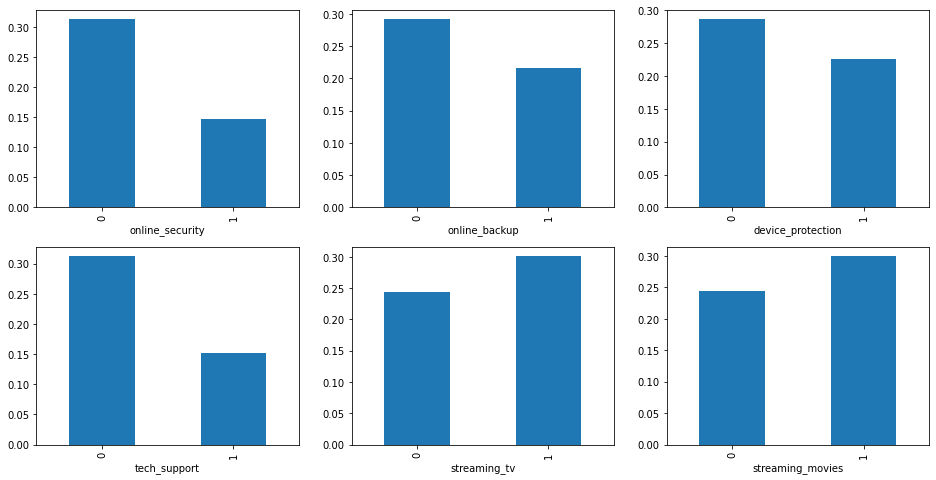

In [24]:
#create a 2x4 plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

#use groupby to see the mean of churn for each column and then plot it
df_all.groupby('online_security')['churn'].mean().plot(kind='bar', ax=axs[0, 0])
df_all.groupby('online_backup')['churn'].mean().plot(kind='bar', ax=axs[0, 1])
df_all.groupby('device_protection')['churn'].mean().plot(kind='bar', ax=axs[0, 2])
df_all.groupby('tech_support')['churn'].mean().plot(kind='bar', ax=axs[1, 0])
df_all.groupby('streaming_tv')['churn'].mean().plot(kind='bar', ax=axs[1, 1])
df_all.groupby('streaming_movies')['churn'].mean().plot(kind='bar', ax=axs[1, 2])

plt.show()

In [25]:
#add a streamer column that is 1 if they stream tv or movies and 0 if they dont
#df_all['streamer'] = np.where((df_all['streaming_tv'] == 1) | (df_all['streaming_movies'] == 1), 1, 0)

So the chart above signifies the churn rate for each type of extra service that is offered. We can see that for services like online_security, backup, device protection, and techsupport, there is a significantly higher number of people who leave if they don't purchase the extra services. 

But for streaming services, people who do purchase them have higher rates of leaving. So this may tie into the previous observation about bigger spenders leaving. Users that rely on a service that have streaming may be dissatisfied. 

So it really seems like adding on extra services except for streaming services decreases the chances of someone leaving. These will be important features in the training of the model for sure

### Churn differences between types of people (gender, senior status, whether or not they have partners, and if they have dependents)

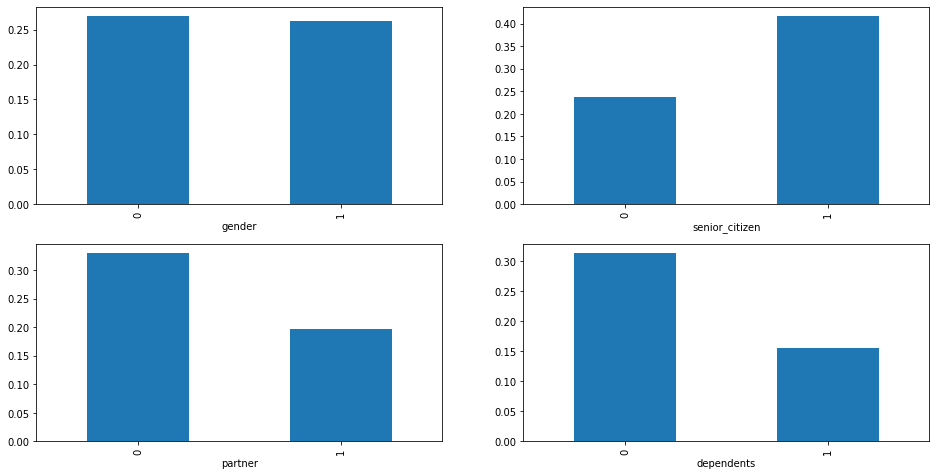

In [26]:
#create a new set of 

#create a 2x4 plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

#use groupby to see the mean of churn for each column and then plot it
df_all.groupby('gender')['churn'].mean().plot(kind='bar', ax=axs[0, 0])
df_all.groupby('senior_citizen')['churn'].mean().plot(kind='bar', ax=axs[0, 1])
df_all.groupby('partner')['churn'].mean().plot(kind='bar', ax=axs[1, 0])
df_all.groupby('dependents')['churn'].mean().plot(kind='bar', ax=axs[1, 1])

plt.show()

 Senior citizens have a higher rate of leaving. However, couples and families have lower rates of leaving. This makes sense because couples and families have more than 1 member so it would be more of an effort to change multiple people's service provider. 

### Differences in churn rates based on the type of payment (paperless_billing and payment method)

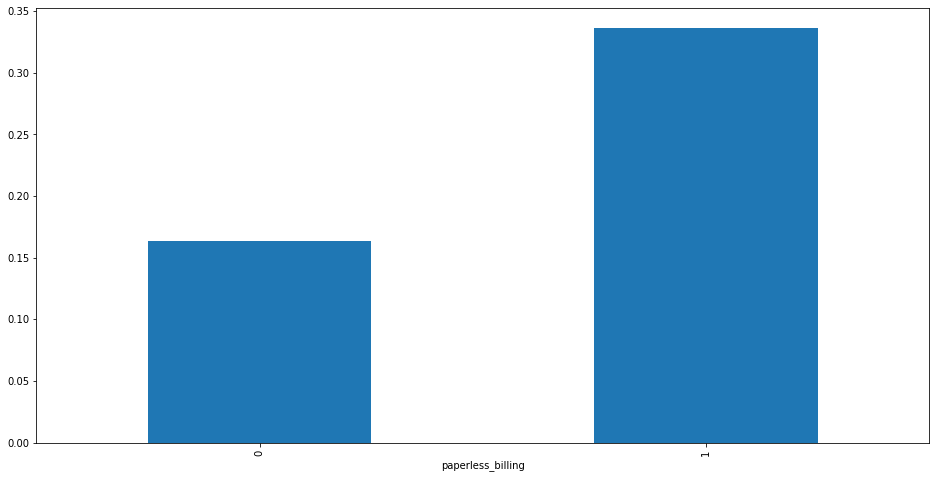

In [27]:
#create 1x1 plot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

#use groupby to see the mean of churn for each column and then plot it
df_all.groupby('paperless_billing')['churn'].mean().plot(kind='bar', ax=axs)

plt.show()

It seems that users who have paperless billing have higher rates of leaving. I'm not sure why this is the case but it still 
indicates that it is an important piece of information

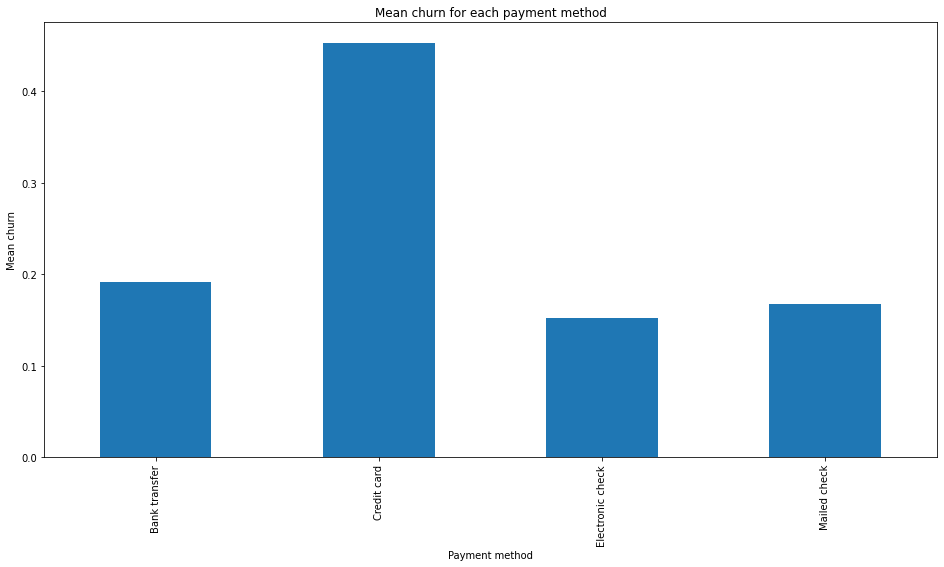

In [28]:
#create 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

#group by payment method and see the mean churn for each payment method
df_all.groupby(['electronic_check', 'mailed_check', 'bank_transfer', 'credit_card'])['churn'].mean().plot(kind='bar', ax=axs)

#title the plot mean churn for each payment method
plt.title('Mean churn for each payment method')
plt.ylabel('Mean churn')
plt.xlabel('Payment method')

plt.xticks([0, 1, 2, 3], ['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check'])
plt.show()

So for here it looks like credit cards have a higher rate of churning. Interesting.

#### EDA Conclusion

In conclusion, I have found out that there are many distinct correlations between churn rates and features in the dataset.

The most interesting finding is that the majority of users who left the service did so within the first couple of months. So one action the company could take is to aggressively give promotions and discounts to newer users to hopefully retain users. In addition to this, they could offer promos to additional services like online security since users who purchase add ons have a higher chance of staying.

### Creating Dataset for Model and Final Modifications after EDA
- delete all unnecessary columns (including 1 column from each one hot coded feature)
- train_test_split
- use smote to balance out the dataset

In [29]:
#categorize tenure into 3 categories. 0-6 months, 6-12 months, and 12+ months

#use np.where to create a new column called tenure_cat that is 0 if tenure is 0-6 months, 1 if tenure is 6-12 months, and 2 if tenure is 12+ months

df_all['tenure_cat'] = np.where(df_all['tenure'] <= 6, 0, np.where(df_all['tenure'] <= 12, 1, 2))

In [30]:
#delete unnecesaray columns
df_combined = df_all.drop(['gender','customer_id', 'month', 'begin_date', 'end_date', 'tenure'], axis=1)

#drop 1 of the columns from each of the onehot encoded columns
df_combined = df_combined.drop(['fiber_optic', 'Month_to_month', 'electronic_check'], axis=1)

In [31]:
df_combined.columns

Index(['paperless_billing', 'monthly_charges', 'total_charges',
       'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'mailed_check', 'bank_transfer',
       'credit_card', 'dsl', 'no', 'one_year', 'two_year', 'churn',
       'tenure_cat'],
      dtype='object')

In [32]:
#delete the index
df_combined = df_combined.reset_index(drop=True)

In [33]:
X = df_combined.drop('churn', axis=1)
y = df_combined['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [34]:
#print size of train and test
print(X_train.shape)
print(X_test.shape)


(4922, 21)
(2110, 21)


In [35]:
#scale monthly charges and total charges
scaler = StandardScaler()

#for cross validation datasets so i can use pipeline
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#scale for the training monthly charges
scaler.fit(X_train_scaled[['monthly_charges']])
#now use fitted scaler to transform the training and test data
X_train_scaled['monthly_charges_s'] = scaler.transform(X_train_scaled[['monthly_charges']])
X_test_scaled['monthly_charges_s'] = scaler.transform(X_test_scaled[['monthly_charges']])

#do the same for total charges
scaler.fit(X_train_scaled[['total_charges']])
X_train_scaled['total_charges_s'] = scaler.transform(X_train_scaled[['total_charges']])
X_test_scaled['total_charges_s'] = scaler.transform(X_test_scaled[['total_charges']])

#drop the original columns
X_train_scaled = X_train_scaled.drop(['monthly_charges', 'total_charges'], axis=1)
X_test_scaled = X_test_scaled.drop(['monthly_charges', 'total_charges'], axis=1)


## Use SMOTE to address imbalance problem of churn vs no churn 


In [36]:

#start smote
smote = SMOTE()

#fit smote using the X_train_
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

#check the shape of the new data
print(X_train_smote.columns)

Index(['paperless_billing', 'senior_citizen', 'partner', 'dependents',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'mailed_check', 'bank_transfer', 'credit_card', 'dsl', 'no', 'one_year',
       'two_year', 'tenure_cat', 'monthly_charges_s', 'total_charges_s'],
      dtype='object')


In [37]:
#see how many people churned vs how many didnt 
y_train_smote.value_counts()

0    3630
1    3630
Name: churn, dtype: int64

Assessment criteria:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

## Train on Logistic Regression

In [38]:
#logistic regression
reg = LogisticRegression()

reg.fit(X_train_smote, y_train_smote)
y_pred = reg.predict_proba(X_test_scaled)

#to see positive instances
y_proba_pos = y_pred[:, 1]

#score
print(roc_auc_score(y_test, y_proba_pos))

0.8354988632522404


## Test out different boosting models
- lgbm 
- catboost
- use gridsearch to determine best params

In [47]:
#create a gridsearch function that uses SMOTE for balancing and standard scaler to scale values
def grid_search(X_train, y_train, model):

    #define params
    param_grid = {
        'classifier__learning_rate': [0.001, 0.01, 0.1, 0.5],  
        'classifier__max_depth': [3, 5, 7, 10],            
        'classifier__n_estimators': [100, 200, 500, 1000, 2000] 
        }
    
    #create pipeline with custom model
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=12345)),
        ('classifier', model)
    ])

    #scorer 
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

    #define gridsearch
    grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=roc_auc_scorer,
                           cv=5,
                           verbose=1, 
                           n_jobs=-1)
    
    #fit the pipeline
    grid_search.fit(X_train, y_train)

    # Best ROC-AUC score
    print("Best ROC-AUC Score:", grid_search.best_score_)

    # Best parameters found
    print("Best Parameters:", grid_search.best_params_)


In [358]:
#run gridsearch on LGBMClassifier
grid_search(X_train, y_train, LGBMClassifier())

In [359]:
#run gridsearch on catboost
grid_search(X_train, y_train, CatBoostClassifier())

In [48]:
#use best params to create new model
lgbm = LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=200)

#fit
lgbm.fit(X_train_smote, y_train_smote)

#predict
y_pred = lgbm.predict_proba(X_test_scaled)

#to see positive instances
y_proba_pos = y_pred[:, 1]

#score
print(roc_auc_score(y_test, y_proba_pos))


In [39]:
#use best params to create new model
cat = CatBoostClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)

#fit
cat.fit(X_train_smote, y_train_smote)

y_pred = cat.predict_proba(X_test_scaled)

#to see positive instances
y_proba_pos = y_pred[:, 1]

#score
print(roc_auc_score(y_test, y_proba_pos))


0:	learn: 0.6887402	total: 48.4ms	remaining: 48.3s
1:	learn: 0.6843426	total: 50.9ms	remaining: 25.4s
2:	learn: 0.6805248	total: 53ms	remaining: 17.6s
3:	learn: 0.6760900	total: 55.3ms	remaining: 13.8s
4:	learn: 0.6720356	total: 57.4ms	remaining: 11.4s
5:	learn: 0.6683372	total: 59.7ms	remaining: 9.88s
6:	learn: 0.6643344	total: 61.9ms	remaining: 8.79s
7:	learn: 0.6608031	total: 64.1ms	remaining: 7.95s
8:	learn: 0.6572952	total: 66.3ms	remaining: 7.3s
9:	learn: 0.6541347	total: 68.5ms	remaining: 6.78s
10:	learn: 0.6505307	total: 70.7ms	remaining: 6.36s
11:	learn: 0.6468411	total: 73.1ms	remaining: 6.02s
12:	learn: 0.6438994	total: 75.4ms	remaining: 5.72s
13:	learn: 0.6404776	total: 77.8ms	remaining: 5.48s
14:	learn: 0.6376474	total: 80.1ms	remaining: 5.26s
15:	learn: 0.6347263	total: 82.3ms	remaining: 5.06s
16:	learn: 0.6314320	total: 84.4ms	remaining: 4.88s
17:	learn: 0.6286456	total: 86.6ms	remaining: 4.72s
18:	learn: 0.6258213	total: 88.8ms	remaining: 4.59s
19:	learn: 0.6231460	tota

### Final Scores and Conclusion: 

Throughout this project, we went into the intricacies of customer churn with the aim to figure out potential patterns that distinguish churned vs active members of this service. Our eda unearthed many interesting patterns in the data which set the stage for our predictive models. We found the most interesting pattern to be that a lot of the churn occured in the newest members (<5 months of active membership).

We employed several models mostly focused on gradient boosting because of the nonlinearity in the data. This culminated in models that are able to predict churn vs non churn rates effectively and above the 75 ROC-AUC minimum threshold. 

The best score we were able to get was an AUC-ROC of 84  with the CAT classifier. The hyperparameters were lr: 0.01, max_depth: 3, and n_estimators=1000

In the report, please answer the following questions:
What steps of the plan were performed and what steps were skipped (explain why)?
What difficulties did you encounter and how did you manage to solve them?
What were some of the key steps to solving the task?
What is your final model and what quality score does it have?


### Report

What steps of the plan were performed and what steps were skipped (explain why)?
- I believe I completed all steps that I had planned for and there was nothing that I felt necessary had to be skipped. Everything from data prep, eda, final modifications, and model training were necessary for me to complete the project

What difficulties did you encounter and how did you manage to solve them?
- I had some difficulty in the data preparation segment of the project. I made a couple of errors in properly scaling, prepping the data to use in cross grid, and in encoding without data leakage. These were relatively simple problems that didn't require a lot of time in solving but they had the potential to drastically alter the results of the project if they hadn't been corrected. 

What were some of the key steps to solving the task?
- In each step of the project, there were key . In EDA, I believe that the key was to make sense of all the featurers since there were many that covered different aspects of each customer. Spending time to decipher each feature and to create visual diagrams to show relationships between them and the churn was really important in understanding what kind of data I was working with. For the actual data preparation, being very thorough and neat with handling was important. Steps like making sure the data was scaled without leakage between training test sets, using proper OHE encoding techniques, and using the proper sampling techniques was key for me. For the actual model itself, using grid_search was the key in my opinion because it made finding the best hyperparameters simple. 

What is your final model and what quality score does it have?
- My final model is the cat boost classifier with lr of 0.01, max depth of 3, and 1000 estimators. I was able to get an ROC-AUC score of 84.4.